<a href="https://colab.research.google.com/github/orbenishay/pandas-project/blob/master/Bicycle_6_Hagai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt # visualization, EDA
import numpy as np  # Mathematical calculations
%matplotlib inline


In [3]:
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

Saving trip.csv to trip.csv


In [0]:
df_station = pd.read_csv("station.csv", index_col = 'id')
df_station.head()

,name,lat,long,dock_count,city,installation_date
id,,,,,,
2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [0]:
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

Saving weather_n.csv to weather_n.csv


In [0]:
df_weather = pd.read_csv("weather_n.csv")
df_weather.head()

,date,mean_temperature_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,68.0,75.0,10.0,11.0,0,4.0,NaN,286.0,94107
1,8/30/2013,69.0,70.0,10.0,13.0,0,2.0,NaN,291.0,94107
2,8/31/2013,64.0,75.0,10.0,15.0,0,4.0,NaN,284.0,94107
3,09/01/2013,66.0,68.0,10.0,13.0,0,4.0,NaN,284.0,94107
4,09/02/2013,69.0,77.0,10.0,12.0,0,6.0,NaN,277.0,94107


In [77]:
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

Saving trip.csv to trip (1).csv


TypeError: ignored

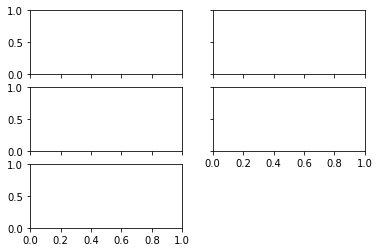

In [80]:
# Hagai's Analysis:
df_trip = pd.read_csv("trip.csv",
                   index_col='id')

# ----------------------------------------------------------------------------------------
# Year/Month aggregation
df_trip['day']=df_trip['start_date']
df_trip['year'] = pd.DatetimeIndex(df_trip['start_date']).year
df_trip['month'] = pd.DatetimeIndex(df_trip['start_date']).month
df_trip['day'] = pd.DatetimeIndex(df_trip['start_date']).day
df_trip['hour'] = pd.DatetimeIndex(df_trip['start_date']).hour
df_trip['weekday'] = pd.DatetimeIndex(df_trip['start_date']).weekday
df_group=df_trip.groupby(['month','year']).agg({'start_date':'count'}).unstack(-1)
df_group.plot(kind='bar', stacked=False, figsize=(12, 6), by='year')
df_group.head(20)
df_trip['start']=pd.to_datetime(df_trip['start_date'])
df_trip['end']=pd.to_datetime(df_trip['end_date'])
df_trip['duration']=df_trip['end']-df_trip['start']
df_trip.head()

# ------------------------------------------------------------------------------------------
# rents distribution by city
df_station = pd.read_csv("station.csv", index_col = 'id')
df_trip_station = df_trip.merge(df_station, how='left', left_on = 'start_station_id', right_on='id')
df_trip_station.head()
df_group_city_station=df_trip_station.groupby(['city','station_name']).agg({'start_date':'count'})
df_group_city_station.boxplot(column='start_date', by='city')
df_group_city_station.groupby('city').describe().unstack(0)
df_group_city_station.head()

# ------------------------------------------------------------------------------------------
# count rent by hour & weekday

# ------------------------------------------------------------------------------------------
# duration distribution
df_trip['start']=pd.to_datetime(df_trip['start_date'])
df_trip['end']=pd.to_datetime(df_trip['end_date'])
df_trip['duration']=df_trip['end']-df_trip['start']
df_station = pd.read_csv("station.csv", index_col = 'id')
df_trip_station = df_trip.merge(df_station, how='left', left_on = 'start_station_id', right_on='id')
df_trip_station.hist(column='duration', by='city', bins=50, sharex=True, sharey=True)





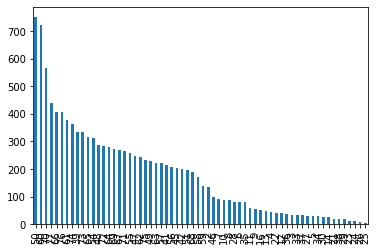

In [0]:
df_trip['start_station_id'].value_counts().plot.bar()

In [0]:
df_station_count = df_trip.join(how='left', other= df_station)
df_station_count.groupby('name').apply(lambda x: x.count(), axis=0)

""
name


In [0]:
df_station_count

,start_station_id,end_station_id,bike_id,subscription_type,zip_code,start_date,end_date,name,lat,long,dock_count,city,installation_date
0,50,61,415,Subscriber,94107,01/09/2013 23:00,01/09/2013 23:24,Harry Bridges Plaza (Ferry Building),37.795392,-122.394203,23,San Francisco,8/20/2013
1,36,38,117,Customer,94063,04/09/2013 11:00,04/09/2013 11:03,California Ave Caltrain Station,37.429082,-122.142805,15,Palo Alto,8/14/2013
2,2,7,657,Subscriber,95113,04/09/2013 21:00,04/09/2013 21:09,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
3,2,7,37,Subscriber,95113,04/09/2013 21:00,04/09/2013 21:09,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
4,69,77,436,Customer,94107,05/09/2013 18:00,05/09/2013 18:18,San Francisco Caltrain 2 (330 Townsend),37.776600,-122.395470,23,San Francisco,8/23/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95294,64,76,67,Subscriber,94107,13/09/2014 8:53,13/09/2014 9:02,2nd at South Park,37.782259,-122.392738,15,San Francisco,8/22/2013
95295,54,74,576,Subscriber,94107,13/09/2014 8:33,13/09/2014 8:38,Embarcadero at Bryant,37.787152,-122.388013,15,San Francisco,8/20/2013
95296,69,82,437,Subscriber,94107,13/09/2014 8:11,13/09/2014 8:25,San Francisco Caltrain 2 (330 Townsend),37.776600,-122.395470,23,San Francisco,8/23/2013
95297,65,69,437,Subscriber,94107,13/09/2014 8:00,13/09/2014 8:02,Townsend at 7th,37.771058,-122.402717,15,San Francisco,8/22/2013


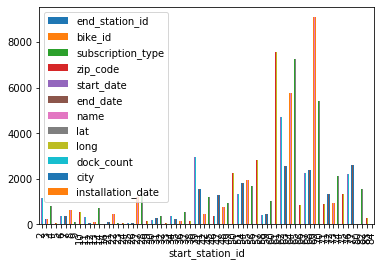

In [0]:
df_station_count = df_trip.merge(df_station, how='left', left_on = 'start_station_id', right_on='id')
df_station_count.groupby('start_station_id').count().plot.bar()


In [0]:
df_trip['subscription_type']('duration').mean().boxplot()